In [2]:
import os
import zipfile
import tarfile
import time
import pandas as pd
import csv
import matplotlib.pyplot as plt

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_2144\1991147391.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Ejercicio 1


In [3]:
#Ejercicio 1. 1
def descomprimir_archivo(ruta_archivo):
    """
    Descomprime un archivo zip o tar.gz.

    Parameters:
    - ruta_archivo (str): Ruta del archivo que se desea descomprimir.

    Returns:
    - None
    """
    # Obtener la extensión del archivo
    _, extension = os.path.splitext(ruta_archivo)

    if extension == ".zip":
        with zipfile.ZipFile(ruta_archivo, 'r') as zip_ref:
            zip_ref.extractall(os.path.dirname(ruta_archivo))
        print(f'Archivo {ruta_archivo} descomprimido exitosamente.')

    elif extension == ".tar.gz":
        with tarfile.open(ruta_archivo, 'r:gz') as tar_ref:
            tar_ref.extractall(os.path.dirname(ruta_archivo))
        print(f'Archivo {ruta_archivo} descomprimido exitosamente.')

    else:
        print(f'Error: El archivo {ruta_archivo} no está en formato zip o tar.gz.')

# Ejemplo de uso para descomprimir TMDB.zip
ruta_tmdb_zip = 'data/TMDB.zip'
descomprimir_archivo(ruta_tmdb_zip)

Archivo data/TMDB.zip descomprimido exitosamente.


In [4]:
#1.2 
def integrar_csv_en_dataframe(ruta_carpeta):
    archivos_csv = ["TMDB_distribution.csv", "TMDB_info.csv", "TMDB_overview.csv"]
    df_integrado = None  # Inicializar a None

    for archivo in archivos_csv:
        ruta_archivo = os.path.join(ruta_carpeta, archivo)
        df_temporal = pd.read_csv(ruta_archivo)
        
        # En la primera iteración, asignar df_temporal a df_integrado
        if df_integrado is None:
            df_integrado = df_temporal
        else:
            # En las siguientes iteraciones, realizar el merge
            df_integrado = pd.merge(df_integrado, df_temporal, on='id', how='outer')

    return df_integrado

# Medir el tiempo de procesamiento
inicio_tiempo = time.time()

# Ruta de la carpeta que contiene los archivos CSV
ruta_carpeta_data = 'data'

# Obtener el DataFrame integrado
df_final = integrar_csv_en_dataframe(ruta_carpeta_data)

# Calcular el tiempo de procesamiento
tiempo_procesamiento = time.time() - inicio_tiempo
print(f'Tiempo de procesamiento: {tiempo_procesamiento:.2f} segundos')

# Mostrar las primeras filas del DataFrame resultante
print(df_final.head())

Tiempo de procesamiento: 2.96 segundos
   id             genres                                         created_by  \
0   1              Drama                                                NaN   
1   2  Animation, Comedy            Kevin Smith, Scott Mosier, David Mandel   
2   3             Comedy                                                NaN   
3   4              Drama                                   Sally Wainwright   
4   5             Comedy  Ricky Gervais, Stephen Merchant, Anne-Marie Lo...   

              networks                               production_companies  \
0              Fuji TV                                                NaN   
1  ABC, Comedy Central  Touchstone Television, View Askew Productions,...   
2            BBC Three                                                NaN   
3              BBC One                                                NaN   
4              Bell TV                                                NaN   

  origin_country      p

In [5]:
#1.3
def integrar_csv_en_diccionario(ruta_carpeta_data):
    # Medir el tiempo de procesamiento
    inicio_tiempo = time.time()

    diccionario_integrado = {}
    archivos_csv = ["TMDB_distribution.csv", "TMDB_info.csv", "TMDB_overview.csv"]

    for archivo in archivos_csv:
        ruta_archivo = os.path.join(ruta_carpeta_data, archivo)

        with open(ruta_archivo, 'r', newline='', encoding='utf-8') as file:
            reader = csv.DictReader(file)
            
            for row in reader:
                id_valor = row['id']
                diccionario_interno = {k: v for k, v in row.items() if k != 'id'}
                diccionario_integrado.setdefault(id_valor, {}).update(diccionario_interno)

    # Calcular el tiempo de procesamiento
    tiempo_procesamiento = time.time() - inicio_tiempo
    print(f'Tiempo de procesamiento: {tiempo_procesamiento:.2f} segundos')

    return diccionario_integrado

# Ruta de la carpeta que contiene los archivos CSV
ruta_carpeta_data = 'data'

# Obtener el diccionario integrado
diccionario_resultante = integrar_csv_en_diccionario(ruta_carpeta_data)

# Mostrar las primeras 5 claves y valores del diccionario resultante
print('Primeras 5 claves y valores del diccionario resultante:')
for key, value in list(diccionario_resultante.items())[:5]:
    print(f'Clave: {key}, Valores: {value}')

Tiempo de procesamiento: 6.21 segundos
Primeras 5 claves y valores del diccionario resultante:
Clave: 1399, Valores: {'genres': 'Sci-Fi & Fantasy, Drama, Action & Adventure', 'created_by': 'David Benioff, D.B. Weiss', 'networks': 'HBO', 'production_companies': 'Revolution Sun Studios, Television 360, Generator Entertainment, Bighead Littlehead', 'origin_country': 'US', 'production_countries': 'United Kingdom, United States of America', 'name': 'Game of Thrones', 'number_of_seasons': '8', 'number_of_episodes': '73', 'original_language': 'en', 'languages': 'en', 'spoken_languages': 'English', 'episode_run_time': '0', 'vote_count': '21857', 'vote_average': '8.442', 'popularity': '1083.917', 'first_air_date': '2011-04-17', 'last_air_date': '2019-05-19', 'adult': 'False', 'in_production': 'False', 'type': 'Scripted', 'status': 'Ended', 'original_name': 'Game of Thrones', 'tagline': 'Winter Is Coming', 'overview': "Seven noble families fight for control of the mythical land of Westeros. Fric

1.4. La diferencia fundamental es que con Pandas es más rápida la ejecución de la función. Esto es debido a que Pandas está optimizado para operaciones con datos tubulares. Mientras que la lectura de archivos CSV con csv.DictReader y la iteración sobre las filas es más lenta. En la función con Pandas, Pandas opera directamente sobre la estructura tabular mientras que en la otra función debemos construir y actualizar diccionarios. 
Además, sabemos que Pandas tiene mecanismos internos para administar con eficiencia la memoria. 
Para un mejor rendimiento de conjuntos de datos grandes como ficheros de 10 GB utilizar Pandas es más eficiente porque está optimizado para este volumen de datos en forma tabular.  

#### Procesamiento

In [6]:
# 2.1 
# Convertir las columnas de fechas a tipo datetime
df_final['first_air_date'] = pd.to_datetime(df_final['first_air_date'])
df_final['last_air_date'] = pd.to_datetime(df_final['last_air_date'])

# Incluir la variable air_days
df_final['air_days'] = (df_final['last_air_date'] - df_final['first_air_date']).dt.days

# Mostrar los 10 registros del dataset que más días han estado en emisión
top_10_air_days = df_final.nlargest(10, 'air_days')
print(top_10_air_days[['name', 'first_air_date', 'last_air_date', 'air_days']])

                                             name first_air_date  \
609                              CBS Evening News     1941-07-01   
140321  Neujahrskonzert der Wiener Philharmoniker     1941-01-01   
63245                         Golden Globe Awards     1944-01-20   
21768                                   BBC Proms     1947-09-06   
4300                               Meet the Press     1947-11-06   
5456               Macy's Thanksgiving Day Parade     1948-11-25   
24354                            The BAFTA Awards     1949-05-29   
26494                             The Emmy Awards     1949-01-25   
1683                               ABC World News     1948-08-11   
59416                      Sanremo Music Festival     1951-01-29   

       last_air_date  air_days  
609       2023-10-02   30043.0  
140321    2023-01-01   29950.0  
63245     2023-01-10   28845.0  
21768     2023-09-09   27762.0  
4300      2023-04-16   27555.0  
5456      2022-11-24   27027.0  
24354     2023-02-19

In [7]:
# 2.2
# Crear un diccionario
diccionario_posters = {}

# Iterar sobre las filas del DataFrame df_final
for index, row in df_final.iterrows():
    nombre_serie = row['name']
    homepage = row['homepage']
    poster_path = row['poster_path']

    # Comprobar si homepage o poster_path son NaN o ""
    if pd.isna(homepage) or homepage == "":
        homepage = "NOT AVAILABLE"
    if pd.isna(poster_path) or poster_path == "":
        poster_path = "NOT AVAILABLE"

    # Construir la dirección web completa del poster
    direccion_web_poster = f"{homepage}/{poster_path}"

    # Añadir al diccionario
    diccionario_posters[nombre_serie] = {"homepage": homepage, "poster_path": poster_path}

# Mostrar los primeros 5 registros del diccionario
for key, value in list(diccionario_posters.items())[:5]:
    print(f'Clave: {key}, Valores: {value}')

Clave: Pride, Valores: {'homepage': 'https://www.fxnetworks.com/shows/pride', 'poster_path': '/k8rIxb9viEJqY3Un7gpTdxxFPlO.jpg'}
Clave: Clerks, Valores: {'homepage': 'NOT AVAILABLE', 'poster_path': '/zPG1yKMwOPe6Jt6pKdpcywPmnVr.jpg'}
Clave: The Message, Valores: {'homepage': 'NOT AVAILABLE', 'poster_path': '/1Edz6JeUVPH5d4MTI5yj4A6Twb.jpg'}
Clave: The Amazing Mrs Pritchard, Valores: {'homepage': 'https://www.bbc.co.uk/programmes/b006mg4s', 'poster_path': '/r2iyYZ98eN70C7kkUIYbW3QaJwn.jpg'}
Clave: La Job, Valores: {'homepage': 'NOT AVAILABLE', 'poster_path': '/heOhqAyj2L64R2HuFZmEay7zqoj.jpg'}


#### Filtrado de datos

In [8]:
#Ejercicio 3.1

# Filtrar el DataFrame para obtener las series en inglés con palabras "mystery" o "crime" en el resumen
series_interesantes = df_final[(df_final['original_language'] == 'en') & 
                               (df_final['overview'].str.contains('mystery|crime', case=False))]

# Mostrar los nombres de las series
nombres_series_interesantes = series_interesantes['name'].tolist()
print("Nombres de las series en inglés con 'mystery' o 'crime' en el resumen:")
for nombre in nombres_series_interesantes:
    print(nombre)

Nombres de las series en inglés con 'mystery' o 'crime' en el resumen:
Strange Days at Blake Holsey High
Bugs
Hawaii
Medium
Pacific Blue
Houston Knights
Dateline
Runaway
Kyle XY
Sharpe
The New Scooby and Scrappy-Doo Show
The Flash
Star Cops
Sightings
The Evidence
Most Haunted
Nash Bridges
Murder, She Wrote
Law & Order
Numb3rs
Martial Law
Renegade
The Black Donnellys
The Adventures of Shirley Holmes
What's New, Scooby-Doo?
The Singing Detective
The FBI Files
The Psychiatrist
Boomtown
The Uninvited
Acapulco H.E.A.T.
Midsomer Murders
Line of Fire
Spider-Man
Murder Most Horrid
Black Books
Scooby-Doo, Where Are You!
Burke's Law
The Rockford Files
The Rookies
Spenser: For Hire
Mrs. Columbo
Philip Marlowe, Private Eye
The New Scooby-Doo Movies
A Man Called Hawk
Inside Edition
Ashes to Ashes
The Law & Harry McGraw
A Nero Wolfe Mystery
Black Scorpion
Father Dowling Mysteries
FX: The Series
Banacek
Police Files: Unlocked
Breaking Bad
Person of Interest
Elementary
Castle
Orange Is the New Black
L

In [9]:
#3.2

# Filtrar el DataFrame para obtener las series que han empezado en 2023 y han sido canceladas
series_canceladas_2023 = df_final[(df_final['status'] == 'Canceled') & 
                                   (df_final['first_air_date'].dt.year == 2023)]

# Mostrar los primeros 20 elementos de la lista
print("Series que han empezado en 2023 y han sido canceladas (primeros 20 elementos):")
print(series_canceladas_2023['name'].head(20).tolist())

Series que han empezado en 2023 y han sido canceladas (primeros 20 elementos):
["You'll Never Know", 'Grease: Rise of the Pink Ladies', 'High Desert', '@Gina Yei: #WithAllMyHeartAndMore', 'Justice in the Dark', 'The Idol', 'The Head of Joaquín Murrieta', 'The Low Tone Club', 'Freeridge', 'City on Fire', 'Dear Edward', 'A Town Called Malice', 'Gotham Knights', 'True Lies', 'The Watchful Eye', 'The Company You Keep', 'Bling Empire: New York', 'Lockwood & Co.', 'Minha Mãe Cozinha Melhor Que a Sua', 'De Vermeires']


In [10]:
# Ejercicio 3.3
# Filtrar el DataFrame para obtener las series en japonés
series_japonesas = df_final[df_final['languages'].str.contains('ja', case=False, na=False)]

# Seleccionar las columnas requeridas
columnas_seleccionadas = ['name', 'original_name', 'networks', 'production_companies', 'languages']
df_series_japonesas = series_japonesas[columnas_seleccionadas]

# Mostrar los primeros 20 registros por pantalla
print("Primeros 20 registros de series en japonés:")
print(df_series_japonesas.head(20))

Primeros 20 registros de series en japonés:
                             name               original_name  \
0                           Pride                        プライド   
12     How do you like Wednesday?                    水曜どうでしょう   
80                         Mayday                      Mayday   
125                    Food Fight                     フードファイト   
140               Bosco Adventure                  ボスコアドベンチャー   
165    My Life as a Teenage Robot  My Life as a Teenage Robot   
240           Hi Hi Puffy AmiYumi         Hi Hi Puffy AmiYumi   
324                        Honeys                      Honeys   
387        Seijuu Sentai Gingaman                   星獣戦隊ギンガマン   
505          The Mobile Cop Jiban                     機動刑事ジバン   
850                  Eureka Seven                 交響詩篇エウレカセブン   
851       Neon Genesis Evangelion                 新世紀エヴァンゲリオン   
860                The Wallflower                 ヤマトナデシコ七変化♥   
863       Yu-Gi-Oh! Duel Monsters             

#### Análisis gráfico

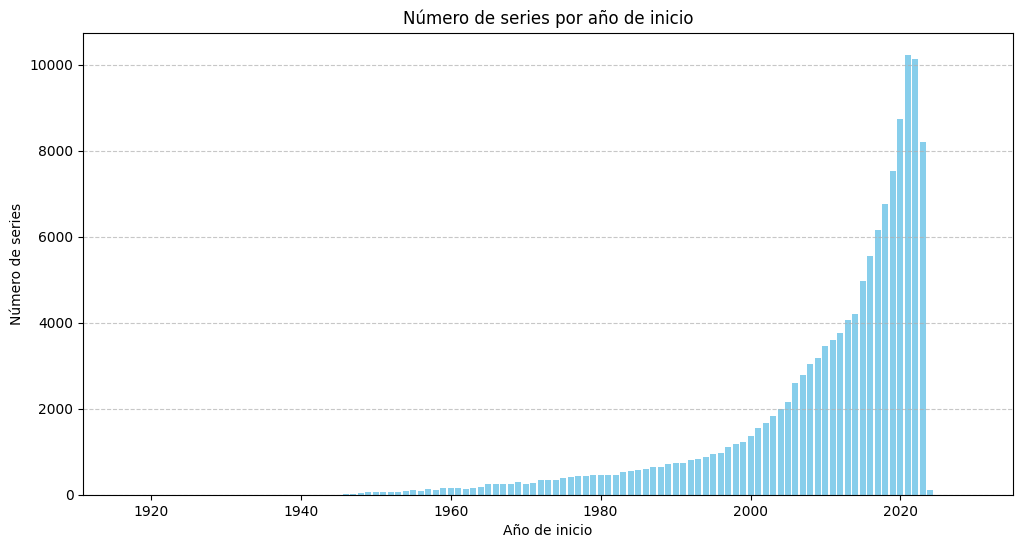

In [11]:
# 4.1
# Contar el número de series por año de inicio
conteo_series_por_anio = df_final['first_air_date'].dt.year.value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(conteo_series_por_anio.index, conteo_series_por_anio.values, color='skyblue')
plt.xlabel('Año de inicio')
plt.ylabel('Número de series')
plt.title('Número de series por año de inicio')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

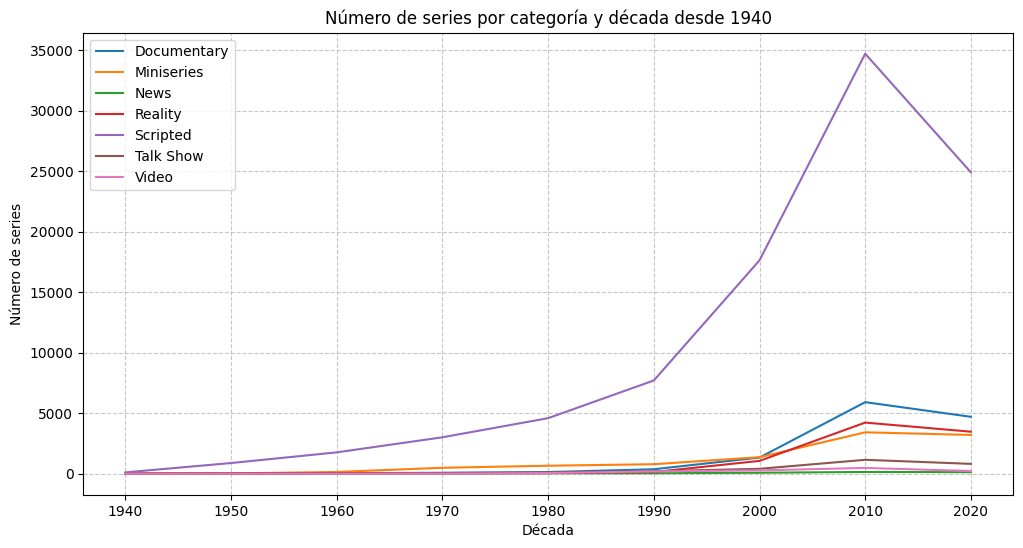

In [12]:
# 4.2

# Crear una columna de décadas a partir de la columna 'first_air_date'
df_final['decade'] = (df_final['first_air_date'].dt.year // 10) * 10

# Filtrar las series producidas desde 1940
df_desde_1940 = df_final[df_final['first_air_date'].dt.year >= 1940]

# Contar el número de series por década y tipo
conteo_series_por_decada_tipo = df_desde_1940.groupby(['decade', 'type']).size().unstack().fillna(0)

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
for tipo in conteo_series_por_decada_tipo.columns:
    plt.plot(conteo_series_por_decada_tipo.index, conteo_series_por_decada_tipo[tipo], label=tipo)

plt.xlabel('Década')
plt.ylabel('Número de series')
plt.title('Número de series por categoría y década desde 1940')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

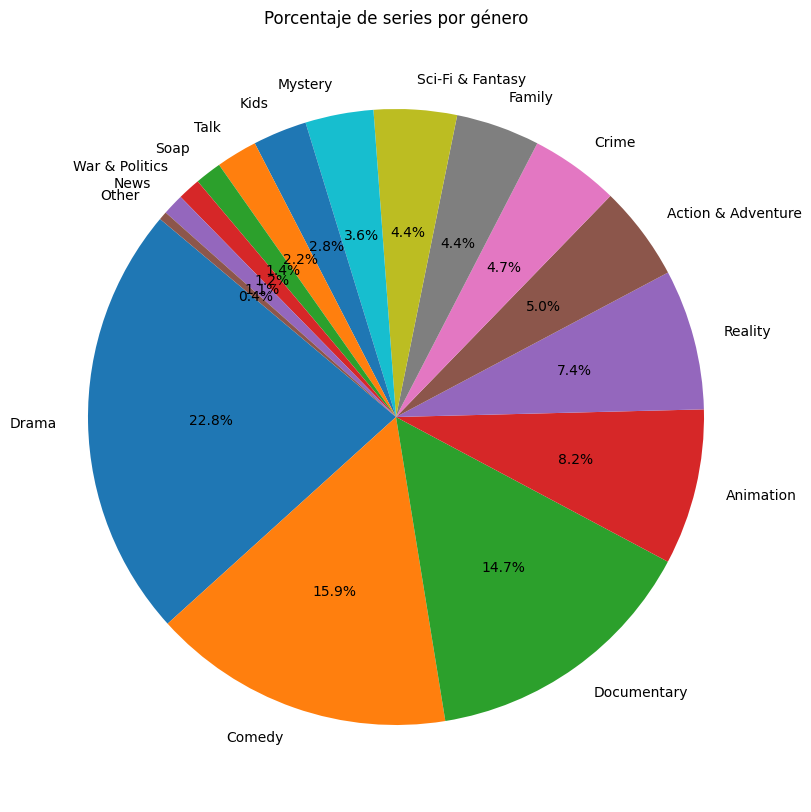

In [13]:
# Eliminar las filas con el campo "genres" vacío
df_genres = df_final.dropna(subset=['genres'])

# Dividir los géneros y contar el número de series por género
conteo_series_por_genero = df_genres['genres'].str.split(', ').explode().value_counts()

# Calcular el porcentaje respecto al total
porcentaje_series_por_genero = (conteo_series_por_genero / conteo_series_por_genero.sum()) * 100

# Filtrar géneros que representan menos del 1% y agruparlos como "Other"
umbral_porcentaje = 1
generos_filtrados = porcentaje_series_por_genero[porcentaje_series_por_genero >= umbral_porcentaje]
generos_filtrados['Other'] = porcentaje_series_por_genero[porcentaje_series_por_genero < umbral_porcentaje].sum()

# Crear el gráfico circular
plt.figure(figsize=(10, 10))
plt.pie(generos_filtrados, labels=generos_filtrados.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de series por género')
plt.show()

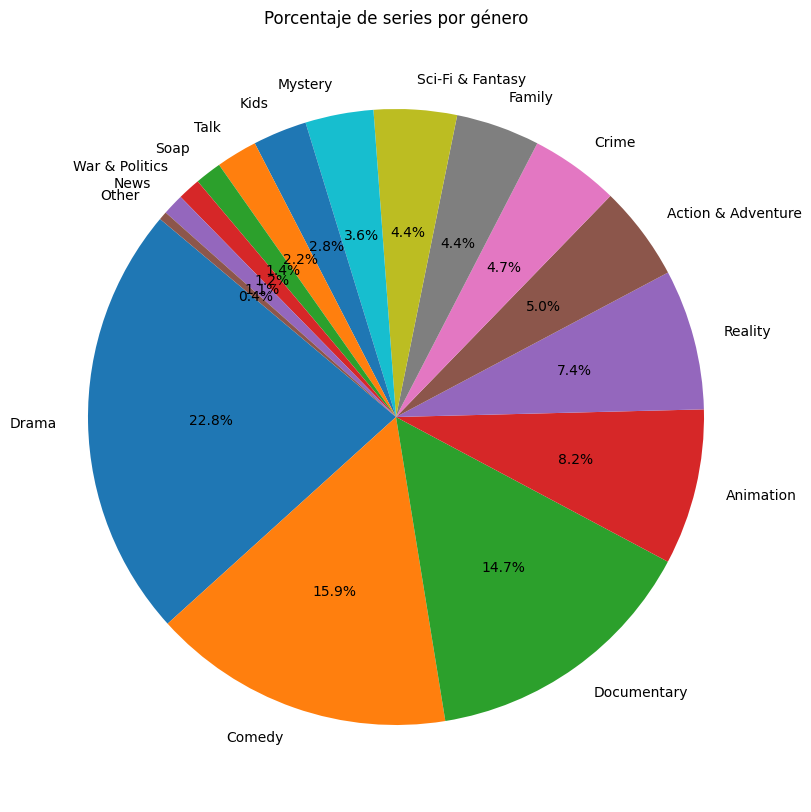

In [14]:
# Eliminar las filas con el campo "genres" vacío
df_genres = df_final.dropna(subset=['genres'])

# Dividir los géneros y contar el número de series por género
conteo_series_por_genero = df_genres['genres'].str.split(', ').explode().value_counts()

# Calcular el porcentaje respecto al total
porcentaje_series_por_genero = (conteo_series_por_genero / conteo_series_por_genero.sum()) * 100

# Filtrar géneros que representan menos del 1% y agruparlos como "Other"
umbral_porcentaje = 1
generos_filtrados = porcentaje_series_por_genero[porcentaje_series_por_genero >= umbral_porcentaje]
otros_porcentaje = porcentaje_series_por_genero[porcentaje_series_por_genero < umbral_porcentaje].sum()

# Agregar la categoría "Other" con el porcentaje acumulado
generos_filtrados['Other'] = otros_porcentaje

# Crear el gráfico circular
plt.figure(figsize=(10, 10))
# Si hay géneros filtrados, mostrar el gráfico con porcentajes
if not generos_filtrados.empty:
    plt.pie(generos_filtrados, labels=generos_filtrados.index, autopct='%1.1f%%', startangle=140)
else:
    # Si no hay géneros filtrados, mostrar el gráfico sin porcentajes
    plt.pie([1], labels=['Other'], startangle=140)
plt.title('Porcentaje de series por género')
plt.show()

In [54]:
df_final.head()

,id,genres,created_by,networks,production_companies,origin_country,production_countries,name,number_of_seasons,number_of_episodes,...,in_production,type,status,original_name,tagline,overview,backdrop_path,homepage,poster_path,air_days
0,1,Drama,NaN,Fuji TV,NaN,JP,Japan,Pride,1,11,...,False,Scripted,Ended,プライド,NaN,Haru Satonaka is the captain of an ice-hockey ...,/j8PrRaUPI19b1ZxsXaT03bQpjWm.jpg,https://fujitv.co.jp/b_hp/m9_pride,/9Ub2BwnLYKoiSaQF93ItyXriCon.jpg,70.0
1,2,"Animation, Comedy","Kevin Smith, Scott Mosier, David Mandel","ABC, Comedy Central","Touchstone Television, View Askew Productions,...",US,United States of America,Clerks,1,6,...,False,Scripted,Canceled,Clerks,NaN,The continuing adventures of store clerks Dant...,/7M0huD4pLqe15c3VSxBMCqzFMSW.jpg,NaN,/xunXvzFlkf1GGgMkCySA9CCFumB.jpg,935.0
2,3,Comedy,NaN,BBC Three,NaN,GB,NaN,The Message,1,6,...,False,Scripted,Ended,The Message,NaN,The Message was a surreal comedy series which ...,NaN,http://www.messagetelevision.com/,/wK9h8FwbmOWlMyW6fT2C6yFPvSu.jpg,35.0
3,4,Drama,Sally Wainwright,BBC One,NaN,GB,NaN,The Amazing Mrs Pritchard,1,6,...,False,Scripted,Ended,The Amazing Mrs Pritchard,From middle-class mum to Prime Minister.,Supermarket manager Ros Pritchard decides to s...,/oJdDWkRNkdWrYhOTNyooJDJEFoX.jpg,https://www.bbc.co.uk/programmes/b006mg4s,/r2iyYZ98eN70C7kkUIYbW3QaJwn.jpg,35.0
4,5,Comedy,"Ricky Gervais, Stephen Merchant, Anne-Marie Lo...",Bell TV,NaN,CA,NaN,La Job,1,12,...,False,Scripted,Ended,La Job,NaN,La Job is a French Canadian comedy television ...,NaN,NaN,/heOhqAyj2L64R2HuFZmEay7zqoj.jpg,35.0


In [47]:
df_final.columns

Index(['id', 'genres', 'created_by', 'networks', 'production_companies',
       'origin_country', 'production_countries', 'name', 'number_of_seasons',
       'number_of_episodes', 'original_language', 'languages',
       'spoken_languages', 'episode_run_time', 'vote_count', 'vote_average',
       'popularity', 'first_air_date', 'last_air_date', 'adult',
       'in_production', 'type', 'status', 'original_name', 'tagline',
       'overview', 'backdrop_path', 'homepage', 'poster_path', 'air_days'],
      dtype='object')

In [48]:
#2.2
# Crear un diccionario
diccionario_posters = {}

# Iterar sobre las filas del DataFrame df_final
for index, row in df_final.iterrows():
    nombre_serie = row['name']
    homepage = row['homepage']
    poster_path = row['poster_path']

    # Comprobar si homepage o poster_path son NaN o ""
    if pd.isna(homepage) or homepage == "":
        homepage = "NOT AVAILABLE"
    if pd.isna(poster_path) or poster_path == "":
        poster_path = "NOT AVAILABLE"

    # Construir la dirección web completa del poster
    direccion_web_poster = f"{homepage}/{poster_path}"

    # Añadir al diccionario
    diccionario_posters[nombre_serie] = direccion_web_poster

# Mostrar los primeros 5 registros del diccionario
for key, value in list(diccionario_posters.items())[:5]:
    print(f'Nombre de la serie: {key}, Dirección web del poster: {value}')

Nombre de la serie: Pride, Dirección web del poster: https://www.fxnetworks.com/shows/pride//k8rIxb9viEJqY3Un7gpTdxxFPlO.jpg
Nombre de la serie: Clerks, Dirección web del poster: NOT AVAILABLE//zPG1yKMwOPe6Jt6pKdpcywPmnVr.jpg
Nombre de la serie: The Message, Dirección web del poster: NOT AVAILABLE//1Edz6JeUVPH5d4MTI5yj4A6Twb.jpg
Nombre de la serie: The Amazing Mrs Pritchard, Dirección web del poster: https://www.bbc.co.uk/programmes/b006mg4s//r2iyYZ98eN70C7kkUIYbW3QaJwn.jpg
Nombre de la serie: La Job, Dirección web del poster: NOT AVAILABLE//heOhqAyj2L64R2HuFZmEay7zqoj.jpg


In [49]:
# Crear un diccionario
diccionario_posters = {}

# Iterar sobre las filas del DataFrame df_final
for index, row in df_final.iterrows():
    nombre_serie = row['name']
    homepage = row['homepage']
    poster_path = row['poster_path']

    # Comprobar si homepage o poster_path son NaN o ""
    if pd.isna(homepage) or homepage == "":
        homepage = "NOT AVAILABLE"
    if pd.isna(poster_path) or poster_path == "":
        poster_path = "NOT AVAILABLE"

    # Construir la dirección web completa del poster
    direccion_web_poster = f"{homepage}{poster_path}"

    # Añadir al diccionario
    diccionario_posters[nombre_serie] = direccion_web_poster

# Mostrar los primeros 5 registros del diccionario
for key, value in list(diccionario_posters.items())[:5]:
    print(f'Nombre de la serie: {key}, Dirección web del poster: {value}')
    print(f'  Homepage: {row["homepage"]}')
    print(f'  Poster Path: {row["poster_path"]}\n')

Nombre de la serie: Pride, Dirección web del poster: https://www.fxnetworks.com/shows/pride/k8rIxb9viEJqY3Un7gpTdxxFPlO.jpg
  Homepage: https://www.ccma.cat/3cat/el-cor-de-lavi/
  Poster Path: /pR5Az7Q8LQuk5xoqYb71DRNeD6a.jpg

Nombre de la serie: Clerks, Dirección web del poster: NOT AVAILABLE/zPG1yKMwOPe6Jt6pKdpcywPmnVr.jpg
  Homepage: https://www.ccma.cat/3cat/el-cor-de-lavi/
  Poster Path: /pR5Az7Q8LQuk5xoqYb71DRNeD6a.jpg

Nombre de la serie: The Message, Dirección web del poster: NOT AVAILABLE/1Edz6JeUVPH5d4MTI5yj4A6Twb.jpg
  Homepage: https://www.ccma.cat/3cat/el-cor-de-lavi/
  Poster Path: /pR5Az7Q8LQuk5xoqYb71DRNeD6a.jpg

Nombre de la serie: The Amazing Mrs Pritchard, Dirección web del poster: https://www.bbc.co.uk/programmes/b006mg4s/r2iyYZ98eN70C7kkUIYbW3QaJwn.jpg
  Homepage: https://www.ccma.cat/3cat/el-cor-de-lavi/
  Poster Path: /pR5Az7Q8LQuk5xoqYb71DRNeD6a.jpg

Nombre de la serie: La Job, Dirección web del poster: NOT AVAILABLE/heOhqAyj2L64R2HuFZmEay7zqoj.jpg
  Homepage: h

In [50]:
# Crear un diccionario
diccionario_posters = {}

# Iterar sobre las filas del DataFrame df_final
for index, row in df_final.iterrows():
    nombre_serie = row['name']
    homepage = row['homepage']
    poster_path = row['poster_path']

    # Comprobar si homepage o poster_path son NaN o ""
    if pd.isna(homepage) or homepage == "":
        homepage = "NOT AVAILABLE"
    if pd.isna(poster_path) or poster_path == "":
        poster_path = "NOT AVAILABLE"

    # Construir la dirección web completa del poster
    direccion_web_poster = f"{homepage}{poster_path}"

    # Añadir al diccionario
    diccionario_posters[nombre_serie] = direccion_web_poster

# Mostrar los primeros 5 registros del diccionario
for key, value in list(diccionario_posters.items())[:5]:
    print(f'Nombre de la serie: {key}, Dirección web del poster: {value}')
    print(f'  Homepage: {homepage}')
    print(f'  Poster Path: {poster_path}\n')

Nombre de la serie: Pride, Dirección web del poster: https://www.fxnetworks.com/shows/pride/k8rIxb9viEJqY3Un7gpTdxxFPlO.jpg
  Homepage: https://www.ccma.cat/3cat/el-cor-de-lavi/
  Poster Path: /pR5Az7Q8LQuk5xoqYb71DRNeD6a.jpg

Nombre de la serie: Clerks, Dirección web del poster: NOT AVAILABLE/zPG1yKMwOPe6Jt6pKdpcywPmnVr.jpg
  Homepage: https://www.ccma.cat/3cat/el-cor-de-lavi/
  Poster Path: /pR5Az7Q8LQuk5xoqYb71DRNeD6a.jpg

Nombre de la serie: The Message, Dirección web del poster: NOT AVAILABLE/1Edz6JeUVPH5d4MTI5yj4A6Twb.jpg
  Homepage: https://www.ccma.cat/3cat/el-cor-de-lavi/
  Poster Path: /pR5Az7Q8LQuk5xoqYb71DRNeD6a.jpg

Nombre de la serie: The Amazing Mrs Pritchard, Dirección web del poster: https://www.bbc.co.uk/programmes/b006mg4s/r2iyYZ98eN70C7kkUIYbW3QaJwn.jpg
  Homepage: https://www.ccma.cat/3cat/el-cor-de-lavi/
  Poster Path: /pR5Az7Q8LQuk5xoqYb71DRNeD6a.jpg

Nombre de la serie: La Job, Dirección web del poster: NOT AVAILABLE/heOhqAyj2L64R2HuFZmEay7zqoj.jpg
  Homepage: h

In [36]:
def integrar_csv_en_diccionario(ruta_carpeta_data):
    diccionario_integrado = {}

    archivos_csv = ["TMDB_distribution.csv", "TMDB_info.csv", "TMDB_overview.csv"]

    for archivo in archivos_csv:
        ruta_archivo = os.path.join(ruta_carpeta_data, archivo)

        with open(ruta_archivo, 'r', newline='', encoding='utf-8') as file:
            reader = csv.DictReader(file)
            
            for row in reader:
                id_valor = row['id']
                diccionario_integrado.setdefault(id_valor, {}).update(row)

    return diccionario_integrado

# Ruta de la carpeta que contiene los archivos CSV
ruta_carpeta_data = 'data'

# Obtener el diccionario integrado
diccionario_resultante = integrar_csv_en_diccionario(ruta_carpeta_data)

# Mostrar las primeras 5 claves y valores del diccionario resultante
print('Primeras 5 claves y valores del diccionario resultante:')
for key, value in list(diccionario_resultante.items())[:5]:
    print(f'Clave: {key}, Valores: {value}')

Primeras 5 claves y valores del diccionario resultante:
Clave: 1399, Valores: {'id': '1399', 'genres': 'Sci-Fi & Fantasy, Drama, Action & Adventure', 'created_by': 'David Benioff, D.B. Weiss', 'networks': 'HBO', 'production_companies': 'Revolution Sun Studios, Television 360, Generator Entertainment, Bighead Littlehead', 'origin_country': 'US', 'production_countries': 'United Kingdom, United States of America', 'name': 'Game of Thrones', 'number_of_seasons': '8', 'number_of_episodes': '73', 'original_language': 'en', 'languages': 'en', 'spoken_languages': 'English', 'episode_run_time': '0', 'vote_count': '21857', 'vote_average': '8.442', 'popularity': '1083.917', 'first_air_date': '2011-04-17', 'last_air_date': '2019-05-19', 'adult': 'False', 'in_production': 'False', 'type': 'Scripted', 'status': 'Ended', 'original_name': 'Game of Thrones', 'tagline': 'Winter Is Coming', 'overview': "Seven noble families fight for control of the mythical land of Westeros. Friction between the houses l

In [37]:
def integrar_csv_en_diccionario(ruta_carpeta_data):
    diccionario_integrado = {}

    archivos_csv = ["TMDB_distribution.csv", "TMDB_info.csv", "TMDB_overview.csv"]

    for archivo in archivos_csv:
        ruta_archivo = os.path.join(ruta_carpeta_data, archivo)

        with open(ruta_archivo, 'r', newline='', encoding='utf-8') as file:
            reader = csv.DictReader(file)
            
            for row in reader:
                id_valor = row['id']
                diccionario_interno = {k: v for k, v in row.items() if k != 'id'}
                diccionario_integrado.setdefault(id_valor, {}).update(diccionario_interno)

    return diccionario_integrado

# Ruta de la carpeta que contiene los archivos CSV
ruta_carpeta_data = 'data'

# Obtener el diccionario integrado
diccionario_resultante = integrar_csv_en_diccionario(ruta_carpeta_data)

# Mostrar las primeras 5 claves y valores del diccionario resultante
print('Primeras 5 claves y valores del diccionario resultante:')
for key, value in list(diccionario_resultante.items())[:5]:
    print(f'Clave: {key}, Valores: {value}')

Primeras 5 claves y valores del diccionario resultante:
Clave: 1399, Valores: {'genres': 'Sci-Fi & Fantasy, Drama, Action & Adventure', 'created_by': 'David Benioff, D.B. Weiss', 'networks': 'HBO', 'production_companies': 'Revolution Sun Studios, Television 360, Generator Entertainment, Bighead Littlehead', 'origin_country': 'US', 'production_countries': 'United Kingdom, United States of America', 'name': 'Game of Thrones', 'number_of_seasons': '8', 'number_of_episodes': '73', 'original_language': 'en', 'languages': 'en', 'spoken_languages': 'English', 'episode_run_time': '0', 'vote_count': '21857', 'vote_average': '8.442', 'popularity': '1083.917', 'first_air_date': '2011-04-17', 'last_air_date': '2019-05-19', 'adult': 'False', 'in_production': 'False', 'type': 'Scripted', 'status': 'Ended', 'original_name': 'Game of Thrones', 'tagline': 'Winter Is Coming', 'overview': "Seven noble families fight for control of the mythical land of Westeros. Friction between the houses leads to full-s

In [51]:
# Crear un diccionario
diccionario_posters = {}

# Iterar sobre las filas del DataFrame df_final
for index, row in df_final.iterrows():
    nombre_serie = row['name']
    homepage = row['homepage']
    poster_path = row['poster_path']

    # Comprobar si homepage o poster_path son NaN o ""
    if pd.isna(homepage) or homepage == "":
        homepage = "NOT AVAILABLE"
    if pd.isna(poster_path) or poster_path == "":
        poster_path = "NOT AVAILABLE"

    # Construir la dirección web completa del poster
    direccion_web_poster = f"{homepage}/{poster_path}"

    # Añadir al diccionario
    diccionario_posters[nombre_serie] = {"homepage": homepage, "poster_path": poster_path}

# Mostrar los primeros 5 registros del diccionario
for key, value in list(diccionario_posters.items())[:5]:
    print(f'Clave: {key}, Valores: {value}')

Clave: Pride, Valores: {'homepage': 'https://www.fxnetworks.com/shows/pride', 'poster_path': '/k8rIxb9viEJqY3Un7gpTdxxFPlO.jpg'}
Clave: Clerks, Valores: {'homepage': 'NOT AVAILABLE', 'poster_path': '/zPG1yKMwOPe6Jt6pKdpcywPmnVr.jpg'}
Clave: The Message, Valores: {'homepage': 'NOT AVAILABLE', 'poster_path': '/1Edz6JeUVPH5d4MTI5yj4A6Twb.jpg'}
Clave: The Amazing Mrs Pritchard, Valores: {'homepage': 'https://www.bbc.co.uk/programmes/b006mg4s', 'poster_path': '/r2iyYZ98eN70C7kkUIYbW3QaJwn.jpg'}
Clave: La Job, Valores: {'homepage': 'NOT AVAILABLE', 'poster_path': '/heOhqAyj2L64R2HuFZmEay7zqoj.jpg'}


In [25]:
df_resultante.head()

,id,genres,created_by,networks,production_companies,origin_country,production_countries,name,number_of_seasons,number_of_episodes,...,adult,in_production,type,status,original_name,tagline,overview,backdrop_path,homepage,poster_path
0,1399,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",HBO,"Revolution Sun Studios, Television 360, Genera...",US,"United Kingdom, United States of America",Game of Thrones,8,73,...,False,False,Scripted,Ended,Game of Thrones,Winter Is Coming,Seven noble families fight for control of the ...,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,http://www.hbo.com/game-of-thrones,/1XS1oqL89opfnbLl8WnZY1O1uJx.jpg
1,71446,"Crime, Drama",Álex Pina,"Netflix, Antena 3",Vancouver Media,ES,Spain,Money Heist,3,41,...,False,False,Scripted,Ended,La Casa de Papel,The perfect robbery.,"To carry out the biggest heist in history, a m...",/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,https://www.netflix.com/title/80192098,/reEMJA1uzscCbkpeRJeTT2bjqUp.jpg
2,66732,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",Netflix,"21 Laps Entertainment, Monkey Massacre Product...",US,United States of America,Stranger Things,4,34,...,False,True,Scripted,Returning Series,Stranger Things,Every ending has a beginning.,"When a young boy vanishes, a small town uncove...",/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,https://www.netflix.com/title/80057281,/49WJfeN0moxb9IPfGn8AIqMGskD.jpg
3,1402,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,AMC,"AMC Studios, Circle of Confusion, Valhalla Mot...",US,United States of America,The Walking Dead,11,177,...,False,False,Scripted,Ended,The Walking Dead,Fight the dead. Fear the living.,Sheriff's deputy Rick Grimes awakens from a co...,/x4salpjB11umlUOltfNvSSrjSXm.jpg,http://www.amc.com/shows/the-walking-dead--100...,/n7PVu0hSz2sAsVekpOIoCnkWlbn.jpg
4,63174,"Crime, Sci-Fi & Fantasy",Tom Kapinos,"FOX, Netflix","Warner Bros. Television, DC Entertainment, Jer...",US,United States of America,Lucifer,6,93,...,False,False,Scripted,Ended,Lucifer,It's good to be bad.,"Bored and unhappy as the Lord of Hell, Lucifer...",/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,https://www.netflix.com/title/80057918,/ekZobS8isE6mA53RAiGDG93hBxL.jpg


In [26]:
num_columnas = df_resultante.shape[1]
print(f'Número de columnas en df_resultante: {num_columnas}')

Número de columnas en df_resultante: 29


In [3]:
import pandas as pd
import os
import time

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4428\554534638.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
def integrar_csv_en_dataframe(ruta_carpeta):
    archivos_csv = ["TMDB_distribution.csv", "TMDB_info.csv", "TMDB_overview.csv"]
    df_integrado = pd.DataFrame()

    for archivo in archivos_csv:
        ruta_archivo = os.path.join(ruta_carpeta, archivo)
        df_temporal = pd.read_csv(ruta_archivo)
        df_integrado = pd.merge(df_integrado, df_temporal, on='id', how='outer')

    return df_integrado

# Medir el tiempo de procesamiento
inicio_tiempo = time.time()

# Ruta de la carpeta que contiene los archivos CSV
ruta_carpeta_data = 'data'

# Obtener el DataFrame integrado
df_resultante = integrar_csv_en_dataframe(ruta_carpeta_data)

# Calcular el tiempo de procesamiento
tiempo_procesamiento = time.time() - inicio_tiempo
print(f'Tiempo de procesamiento: {tiempo_procesamiento:.2f} segundos')

# Mostrar las primeras filas del DataFrame resultante
print(df_resultante.head())

KeyError: 'id'

In [39]:
def integrar_csv_en_dataframe(ruta_carpeta):
    archivos_csv = ["TMDB_distribution.csv", "TMDB_info.csv", "TMDB_overview.csv"]
    df_integrado = None  # Inicializar a None

    for archivo in archivos_csv:
        ruta_archivo = os.path.join(ruta_carpeta, archivo)
        df_temporal = pd.read_csv(ruta_archivo)
        
        # En la primera iteración, asignar df_temporal a df_integrado
        if df_integrado is None:
            df_integrado = df_temporal
        else:
            # En las siguientes iteraciones, realizar el merge
            df_integrado = pd.merge(df_integrado, df_temporal, on='id', how='outer')

    return df_integrado

# Medir el tiempo de procesamiento
inicio_tiempo = time.time()

# Ruta de la carpeta que contiene los archivos CSV
ruta_carpeta_data = 'data'

# Obtener el DataFrame integrado
df_resultante = integrar_csv_en_dataframe(ruta_carpeta_data)

# Calcular el tiempo de procesamiento
tiempo_procesamiento = time.time() - inicio_tiempo
print(f'Tiempo de procesamiento: {tiempo_procesamiento:.2f} segundos')

# Mostrar las primeras filas del DataFrame resultante
print(df_resultante.head())

Tiempo de procesamiento: 3.18 segundos
   id             genres                                         created_by  \
0   1              Drama                                                NaN   
1   2  Animation, Comedy            Kevin Smith, Scott Mosier, David Mandel   
2   3             Comedy                                                NaN   
3   4              Drama                                   Sally Wainwright   
4   5             Comedy  Ricky Gervais, Stephen Merchant, Anne-Marie Lo...   

              networks                               production_companies  \
0              Fuji TV                                                NaN   
1  ABC, Comedy Central  Touchstone Television, View Askew Productions,...   
2            BBC Three                                                NaN   
3              BBC One                                                NaN   
4              Bell TV                                                NaN   

  origin_country      p

In [4]:
def integrar_csv_en_dataframe(ruta_carpeta):
    """
    Lee los archivos CSV dentro de una carpeta y los integra en un único DataFrame utilizando "id" como clave.

    Parameters:
    - ruta_carpeta (str): Ruta de la carpeta que contiene los archivos CSV.

    Returns:
    - pd.DataFrame: DataFrame resultante de la integración.
    """
    # Obtener la lista de archivos CSV en la carpeta
    archivos_csv = [archivo for archivo in os.listdir(ruta_carpeta) if archivo.endswith('.csv')]

    # Inicializar un DataFrame vacío para la integración
    df_integrado = pd.DataFrame()

    # Leer cada archivo CSV y fusionarlo en el DataFrame
    for archivo in archivos_csv:
        ruta_archivo = os.path.join(ruta_carpeta, archivo)
        df_temporal = pd.read_csv(ruta_archivo)
        df_integrado = pd.merge(df_integrado, df_temporal, on='id', how='outer')

    return df_integrado

# Medir el tiempo de procesamiento
inicio_tiempo = time.time()

# Ruta de la carpeta que contiene los archivos CSV
ruta_carpeta_data = 'data'

# Obtener el DataFrame integrado
df_resultante = integrar_csv_en_dataframe(ruta_carpeta_data)

# Calcular el tiempo de procesamiento
tiempo_procesamiento = time.time() - inicio_tiempo
print(f'Tiempo de procesamiento: {tiempo_procesamiento:.2f} segundos')

# Mostrar las primeras filas del DataFrame resultante
print(df_resultante.head())

KeyError: 'id'

In [7]:
def integrar_csv_en_dataframe(ruta_carpeta):
    archivos_csv = ["TMDB_distribution.csv", "TMDB_info.csv", "TMDB_overview.csv"]
    df_integrado = pd.DataFrame()

    for archivo in archivos_csv:
        ruta_archivo = os.path.join(ruta_carpeta, archivo)
        df_temporal = pd.read_csv(ruta_archivo)
        df_temporal = df_temporal.drop_duplicates(subset='id')  # Eliminar duplicados
        df_integrado = pd.merge(df_integrado, df_temporal, on='id', how='outer')

    return df_integrado

# Medir el tiempo de procesamiento
inicio_tiempo = time.time()

# Ruta de la carpeta que contiene los archivos CSV
ruta_carpeta_data = 'data'

# Obtener el DataFrame integrado
df_resultante = integrar_csv_en_dataframe(ruta_carpeta_data)

# Calcular el tiempo de procesamiento
tiempo_procesamiento = time.time() - inicio_tiempo
print(f'Tiempo de procesamiento: {tiempo_procesamiento:.2f} segundos')

# Mostrar las primeras filas del DataFrame resultante
print(df_resultante.head())

KeyError: 'id'

In [9]:
def verificar_existencia_columna_id(ruta_carpeta, archivos_csv):
    for archivo in archivos_csv:
        ruta_archivo = os.path.join(ruta_carpeta, archivo)
        df_temporal = pd.read_csv(ruta_archivo)
        
        if 'id' not in df_temporal.columns:
            print(f'Error: El archivo {archivo} no contiene la columna "id".')
            return False

    return True

# Ruta de la carpeta que contiene los archivos CSV
ruta_carpeta_data = 'data'

# Archivos CSV a verificar
archivos_csv_a_verificar = ["TMDB_distribution.csv", "TMDB_info.csv", "TMDB_overview.csv"]


In [10]:
def verificar_existencia_columna_id(ruta_carpeta, archivos_csv):
    for archivo in archivos_csv:
        ruta_archivo = os.path.join(ruta_carpeta, archivo)
        df_temporal = pd.read_csv(ruta_archivo)
        
        # Eliminar espacios adicionales en los nombres de las columnas
        columnas_sin_espacios = [col.strip() for col in df_temporal.columns]
        df_temporal.columns = columnas_sin_espacios

        print(f'Columnas en {archivo}: {columnas_sin_espacios}')

        if 'id' not in columnas_sin_espacios:
            print(f'Error: El archivo {archivo} no contiene la columna "id".')
            return False

    return True

# Ruta de la carpeta que contiene los archivos CSV
ruta_carpeta_data = 'data'

# Archivos CSV a verificar
archivos_csv_a_verificar = ["TMDB_distribution.csv", "TMDB_info.csv", "TMDB_overview.csv"]

# Verificar existencia de la columna 'id' y espacios adicionales en los nombres de las columnas
if verificar_existencia_columna_id(ruta_carpeta_data, archivos_csv_a_verificar):
    print('Todos los archivos contienen la columna "id" y no tienen espacios adicionales en los nombres de las columnas.')
    print('Puedes proceder con la fusión.')
else:
    print('Hay archivos que no contienen la columna "id" o tienen espacios adicionales en los nombres de las columnas.')
    print('Corrige esto antes de proceder con la fusión.')

Columnas en TMDB_distribution.csv: ['id', 'genres', 'created_by', 'networks', 'production_companies', 'origin_country', 'production_countries']
Columnas en TMDB_info.csv: ['id', 'name', 'number_of_seasons', 'number_of_episodes', 'original_language', 'languages', 'spoken_languages', 'episode_run_time', 'vote_count', 'vote_average', 'popularity', 'first_air_date', 'last_air_date', 'adult', 'in_production', 'type', 'status']
Columnas en TMDB_overview.csv: ['id', 'original_name', 'tagline', 'overview', 'backdrop_path', 'homepage', 'poster_path']
Todos los archivos contienen la columna "id" y no tienen espacios adicionales en los nombres de las columnas.
Puedes proceder con la fusión.


In [11]:
def verificar_existencia_columna_id(ruta_carpeta, archivos_csv):
    columnas_id = set()

    for archivo in archivos_csv:
        ruta_archivo = os.path.join(ruta_carpeta, archivo)
        df_temporal = pd.read_csv(ruta_archivo)

        # Imprimir solo las columnas que contienen 'id'
        columnas_con_id = [col for col in df_temporal.columns if 'id' in col.lower()]
        print(f'Columnas en {archivo} con "id": {columnas_con_id}')

        # Agregar las columnas 'id' al conjunto para la verificación
        columnas_id.update(columnas_con_id)

    # Verificar que todas las columnas 'id' tengan el mismo nombre
    if len(columnas_id) == 1:
        print(f'Todas las columnas "id" tienen el mismo nombre: {columnas_id.pop()}')
        return True
    else:
        print('Error: Las columnas "id" no tienen el mismo nombre en todos los archivos.')
        return False

# Ruta de la carpeta que contiene los archivos CSV
ruta_carpeta_data = 'data'

# Archivos CSV a verificar
archivos_csv_a_verificar = ["TMDB_distribution.csv", "TMDB_info.csv", "TMDB_overview.csv"]

# Verificar existencia y consistencia de la columna 'id'
if verificar_existencia_columna_id(ruta_carpeta_data, archivos_csv_a_verificar):
    print('Todos los archivos contienen la columna "id" y tienen el mismo nombre.')
    print('Puedes proceder con la fusión.')
else:
    print('Hay archivos que no contienen la columna "id" o tienen nombres diferentes para la columna "id".')
    print('Corrige esto antes de proceder con la fusión.')

Columnas en TMDB_distribution.csv con "id": ['id']
Columnas en TMDB_info.csv con "id": ['id']
Columnas en TMDB_overview.csv con "id": ['id']
Todas las columnas "id" tienen el mismo nombre: id
Todos los archivos contienen la columna "id" y tienen el mismo nombre.
Puedes proceder con la fusión.


In [12]:
def integrar_csv_en_dataframe(ruta_carpeta):
    archivos_csv = ["TMDB_distribution.csv", "TMDB_info.csv", "TMDB_overview.csv"]
    df_integrado = pd.DataFrame()

    for archivo in archivos_csv:
        ruta_archivo = os.path.join(ruta_carpeta, archivo)
        df_temporal = pd.read_csv(ruta_archivo)
        df_temporal = df_temporal.drop_duplicates(subset='id')  # Eliminar duplicados
        df_integrado = pd.merge(df_integrado, df_temporal, on='id', how='outer')

    return df_integrado

# Medir el tiempo de procesamiento
inicio_tiempo = time.time()

# Ruta de la carpeta que contiene los archivos CSV
ruta_carpeta_data = 'data'

# Obtener el DataFrame integrado
df_resultante = integrar_csv_en_dataframe(ruta_carpeta_data)

# Calcular el tiempo de procesamiento
tiempo_procesamiento = time.time() - inicio_tiempo
print(f'Tiempo de procesamiento: {tiempo_procesamiento:.2f} segundos')

# Mostrar las primeras filas del DataFrame resultante
print(df_resultante.head())

KeyError: 'id'

In [5]:
def integrar_csv_en_dataframe(ruta_carpeta):
    archivos_csv = ["TMDB_distribution.csv", "TMDB_overview.csv"]
    df_integrado = pd.DataFrame()

    for archivo in archivos_csv:
        ruta_archivo = os.path.join(ruta_carpeta, archivo)
        df_temporal = pd.read_csv(ruta_archivo)
        df_integrado = pd.merge(df_integrado, df_temporal, on='id', how='outer')

    return df_integrado

# Medir el tiempo de procesamiento
inicio_tiempo = time.time()

# Ruta de la carpeta que contiene los archivos CSV
ruta_carpeta_data = 'data'

# Obtener el DataFrame integrado
df_resultante = integrar_csv_en_dataframe(ruta_carpeta_data)

# Calcular el tiempo de procesamiento
tiempo_procesamiento = time.time() - inicio_tiempo
print(f'Tiempo de procesamiento: {tiempo_procesamiento:.2f} segundos')

# Mostrar las primeras filas del DataFrame resultante
print(df_resultante.head())

KeyError: 'id'

In [13]:
# Ruta de la carpeta que contiene los archivos CSV
ruta_carpeta_data = 'data'

# Archivos CSV a mostrar
archivos_csv_a_mostrar = ["TMDB_distribution.csv", "TMDB_info.csv", "TMDB_overview.csv"]

# Mostrar las primeras filas de cada archivo CSV
for archivo in archivos_csv_a_mostrar:
    ruta_archivo = os.path.join(ruta_carpeta_data, archivo)
    df_temporal = pd.read_csv(ruta_archivo)
    
    print(f'Primeras filas de {archivo}:')
    print(df_temporal.head())
    print('\n' + '-'*50 + '\n')  # Separador visual

Primeras filas de TMDB_distribution.csv:
      id                                       genres  \
0   1399  Sci-Fi & Fantasy, Drama, Action & Adventure   
1  71446                                 Crime, Drama   
2  66732             Drama, Sci-Fi & Fantasy, Mystery   
3   1402  Action & Adventure, Drama, Sci-Fi & Fantasy   
4  63174                      Crime, Sci-Fi & Fantasy   

                  created_by           networks  \
0  David Benioff, D.B. Weiss                HBO   
1                  Álex Pina  Netflix, Antena 3   
2   Matt Duffer, Ross Duffer            Netflix   
3             Frank Darabont                AMC   
4                Tom Kapinos       FOX, Netflix   

                                production_companies origin_country  \
0  Revolution Sun Studios, Television 360, Genera...             US   
1                                    Vancouver Media             ES   
2  21 Laps Entertainment, Monkey Massacre Product...             US   
3  AMC Studios, Circle of

In [14]:
# Ruta de la carpeta que contiene los archivos CSV
ruta_carpeta_data = 'data'

# Archivos CSV a mostrar
archivos_csv_a_mostrar = ["TMDB_distribution.csv", "TMDB_info.csv", "TMDB_overview.csv"]

# Mostrar las primeras 5 filas de cada archivo CSV
for archivo in archivos_csv_a_mostrar:
    ruta_archivo = os.path.join(ruta_carpeta_data, archivo)
    df_temporal = pd.read_csv(ruta_archivo)
    
    print(f'Primeras 5 filas de {archivo}:')
    print(df_temporal.head())
    print('\n' + '-'*50 + '\n')  # Separador visual

Primeras 5 filas de TMDB_distribution.csv:
      id                                       genres  \
0   1399  Sci-Fi & Fantasy, Drama, Action & Adventure   
1  71446                                 Crime, Drama   
2  66732             Drama, Sci-Fi & Fantasy, Mystery   
3   1402  Action & Adventure, Drama, Sci-Fi & Fantasy   
4  63174                      Crime, Sci-Fi & Fantasy   

                  created_by           networks  \
0  David Benioff, D.B. Weiss                HBO   
1                  Álex Pina  Netflix, Antena 3   
2   Matt Duffer, Ross Duffer            Netflix   
3             Frank Darabont                AMC   
4                Tom Kapinos       FOX, Netflix   

                                production_companies origin_country  \
0  Revolution Sun Studios, Television 360, Genera...             US   
1                                    Vancouver Media             ES   
2  21 Laps Entertainment, Monkey Massacre Product...             US   
3  AMC Studios, Circle 

In [16]:
# Ruta del archivo CSV
ruta_archivo_distribution = 'data/TMDB_distribution.csv'

# Cargar el archivo CSV como DataFrame
df_distribution = pd.read_csv(ruta_archivo_distribution)

# Mostrar las primeras 5 filas del DataFrame
print('Primeras 5 filas de TMDB_distribution.csv:')
df_distribution.head()

Primeras 5 filas de TMDB_distribution.csv:


,id,genres,created_by,networks,production_companies,origin_country,production_countries
0,1399,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",HBO,"Revolution Sun Studios, Television 360, Genera...",US,"United Kingdom, United States of America"
1,71446,"Crime, Drama",Álex Pina,"Netflix, Antena 3",Vancouver Media,ES,Spain
2,66732,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",Netflix,"21 Laps Entertainment, Monkey Massacre Product...",US,United States of America
3,1402,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,AMC,"AMC Studios, Circle of Confusion, Valhalla Mot...",US,United States of America
4,63174,"Crime, Sci-Fi & Fantasy",Tom Kapinos,"FOX, Netflix","Warner Bros. Television, DC Entertainment, Jer...",US,United States of America


In [17]:
# Ruta del archivo CSV
ruta_archivo_distribution = 'data/TMDB_info.csv'

# Cargar el archivo CSV como DataFrame
df_distribution = pd.read_csv(ruta_archivo_distribution)

# Mostrar las primeras 5 filas del DataFrame
print('Primeras 5 filas de TMDB_info.csv:')
df_distribution.head()

Primeras 5 filas de TMDB_info.csv:


,id,name,number_of_seasons,number_of_episodes,original_language,languages,spoken_languages,episode_run_time,vote_count,vote_average,popularity,first_air_date,last_air_date,adult,in_production,type,status
0,1399,Game of Thrones,8,73,en,en,English,0,21857,8.442,1083.917,2011-04-17,2019-05-19,False,False,Scripted,Ended
1,71446,Money Heist,3,41,es,es,Español,70,17836,8.257,96.354,2017-05-02,2021-12-03,False,False,Scripted,Ended
2,66732,Stranger Things,4,34,en,en,English,0,16161,8.624,185.711,2016-07-15,2022-07-01,False,True,Scripted,Returning Series
3,1402,The Walking Dead,11,177,en,en,English,42,15432,8.121,489.746,2010-10-31,2022-11-20,False,False,Scripted,Ended
4,63174,Lucifer,6,93,en,en,English,45,13870,8.486,416.668,2016-01-25,2021-09-10,False,False,Scripted,Ended


In [19]:
# Ruta del archivo CSV
ruta_archivo_distribution = 'data/TMDB_overview.csv'

# Cargar el archivo CSV como DataFrame
df_distribution = pd.read_csv(ruta_archivo_distribution)

# Mostrar las primeras 5 filas del DataFrame
print('Primeras 5 filas de TMDB_overview.csv:')
df_distribution.head()

Primeras 5 filas de TMDB_overview.csv:


,id,original_name,tagline,overview,backdrop_path,homepage,poster_path
0,1399,Game of Thrones,Winter Is Coming,Seven noble families fight for control of the ...,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,http://www.hbo.com/game-of-thrones,/1XS1oqL89opfnbLl8WnZY1O1uJx.jpg
1,71446,La Casa de Papel,The perfect robbery.,"To carry out the biggest heist in history, a m...",/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,https://www.netflix.com/title/80192098,/reEMJA1uzscCbkpeRJeTT2bjqUp.jpg
2,66732,Stranger Things,Every ending has a beginning.,"When a young boy vanishes, a small town uncove...",/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,https://www.netflix.com/title/80057281,/49WJfeN0moxb9IPfGn8AIqMGskD.jpg
3,1402,The Walking Dead,Fight the dead. Fear the living.,Sheriff's deputy Rick Grimes awakens from a co...,/x4salpjB11umlUOltfNvSSrjSXm.jpg,http://www.amc.com/shows/the-walking-dead--100...,/n7PVu0hSz2sAsVekpOIoCnkWlbn.jpg
4,63174,Lucifer,It's good to be bad.,"Bored and unhappy as the Lord of Hell, Lucifer...",/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,https://www.netflix.com/title/80057918,/ekZobS8isE6mA53RAiGDG93hBxL.jpg


In [20]:

ruta_archivo_distribution = 'data/TMDB_distribution.csv'
ruta_archivo_info = 'data/TMDB_info.csv'

# Cargar los archivos CSV como DataFrames
df_distribution = pd.read_csv(ruta_archivo_distribution)
df_info = pd.read_csv(ruta_archivo_info)

# Unir los DataFrames por la columna 'id'
df_merged = pd.merge(df_distribution, df_info, on='id', how='inner')

# Mostrar las primeras 5 filas del DataFrame resultante
print('Primeras 5 filas del DataFrame fusionado:')
print(df_merged.head())

Primeras 5 filas del DataFrame fusionado:
      id                                       genres  \
0   1399  Sci-Fi & Fantasy, Drama, Action & Adventure   
1  71446                                 Crime, Drama   
2  66732             Drama, Sci-Fi & Fantasy, Mystery   
3   1402  Action & Adventure, Drama, Sci-Fi & Fantasy   
4  63174                      Crime, Sci-Fi & Fantasy   

                  created_by           networks  \
0  David Benioff, D.B. Weiss                HBO   
1                  Álex Pina  Netflix, Antena 3   
2   Matt Duffer, Ross Duffer            Netflix   
3             Frank Darabont                AMC   
4                Tom Kapinos       FOX, Netflix   

                                production_companies origin_country  \
0  Revolution Sun Studios, Television 360, Genera...             US   
1                                    Vancouver Media             ES   
2  21 Laps Entertainment, Monkey Massacre Product...             US   
3  AMC Studios, Circle o

In [21]:

ruta_archivo_overview = 'data/TMDB_overview.csv'

# Cargar el archivo CSV como DataFrame
df_overview = pd.read_csv(ruta_archivo_overview)

# Unir el DataFrame resultante con df_overview por la columna 'id'
df_final = pd.merge(df_merged, df_overview, on='id', how='inner')

# Mostrar las primeras 5 filas del DataFrame final
print('Primeras 5 filas del DataFrame final:')
print(df_final.head())

Primeras 5 filas del DataFrame final:
      id                                       genres  \
0   1399  Sci-Fi & Fantasy, Drama, Action & Adventure   
1  71446                                 Crime, Drama   
2  66732             Drama, Sci-Fi & Fantasy, Mystery   
3   1402  Action & Adventure, Drama, Sci-Fi & Fantasy   
4  63174                      Crime, Sci-Fi & Fantasy   

                  created_by           networks  \
0  David Benioff, D.B. Weiss                HBO   
1                  Álex Pina  Netflix, Antena 3   
2   Matt Duffer, Ross Duffer            Netflix   
3             Frank Darabont                AMC   
4                Tom Kapinos       FOX, Netflix   

                                production_companies origin_country  \
0  Revolution Sun Studios, Television 360, Genera...             US   
1                                    Vancouver Media             ES   
2  21 Laps Entertainment, Monkey Massacre Product...             US   
3  AMC Studios, Circle of Co

In [22]:
def unir_dataframes_por_id(ruta_distribution, ruta_info, ruta_overview):
    # Cargar los archivos CSV como DataFrames
    df_distribution = pd.read_csv(ruta_distribution)
    df_info = pd.read_csv(ruta_info)

    # Unir los DataFrames por la columna 'id'
    df_merged = pd.merge(df_distribution, df_info, on='id', how='inner')

    # Cargar el archivo CSV como DataFrame
    df_overview = pd.read_csv(ruta_overview)

    # Unir el DataFrame resultante con df_overview por la columna 'id'
    df_final = pd.merge(df_merged, df_overview, on='id', how='inner')

    return df_final

# Rutas de los archivos CSV
ruta_archivo_distribution = 'data/TMDB_distribution.csv'
ruta_archivo_info = 'data/TMDB_info.csv'
ruta_archivo_overview = 'data/TMDB_overview.csv'

# Llamar a la función
df_resultante = unir_dataframes_por_id(ruta_archivo_distribution, ruta_archivo_info, ruta_archivo_overview)

# Mostrar las primeras 5 filas del DataFrame final
print('Primeras 5 filas del DataFrame final:')
print(df_resultante.head())

Primeras 5 filas del DataFrame final:
      id                                       genres  \
0   1399  Sci-Fi & Fantasy, Drama, Action & Adventure   
1  71446                                 Crime, Drama   
2  66732             Drama, Sci-Fi & Fantasy, Mystery   
3   1402  Action & Adventure, Drama, Sci-Fi & Fantasy   
4  63174                      Crime, Sci-Fi & Fantasy   

                  created_by           networks  \
0  David Benioff, D.B. Weiss                HBO   
1                  Álex Pina  Netflix, Antena 3   
2   Matt Duffer, Ross Duffer            Netflix   
3             Frank Darabont                AMC   
4                Tom Kapinos       FOX, Netflix   

                                production_companies origin_country  \
0  Revolution Sun Studios, Television 360, Genera...             US   
1                                    Vancouver Media             ES   
2  21 Laps Entertainment, Monkey Massacre Product...             US   
3  AMC Studios, Circle of Co

In [23]:
import pandas as pd
import time

def unir_dataframes_por_id(ruta_distribution, ruta_info, ruta_overview):
    # Medir el tiempo de procesamiento
    inicio_tiempo = time.time()

    # Cargar los archivos CSV como DataFrames
    df_distribution = pd.read_csv(ruta_distribution)
    df_info = pd.read_csv(ruta_info)

    # Unir los DataFrames por la columna 'id'
    df_merged = pd.merge(df_distribution, df_info, on='id', how='inner')

    # Cargar el archivo CSV como DataFrame
    df_overview = pd.read_csv(ruta_overview)

    # Unir el DataFrame resultante con df_overview por la columna 'id'
    df_final = pd.merge(df_merged, df_overview, on='id', how='inner')

    # Calcular el tiempo de procesamiento
    tiempo_procesamiento = time.time() - inicio_tiempo
    print(f'Tiempo de procesamiento: {tiempo_procesamiento:.2f} segundos')

    return df_final

# Rutas de los archivos CSV
ruta_archivo_distribution = 'data/TMDB_distribution.csv'
ruta_archivo_info = 'data/TMDB_info.csv'
ruta_archivo_overview = 'data/TMDB_overview.csv'

# Llamar a la función
df_resultante = unir_dataframes_por_id(ruta_archivo_distribution, ruta_archivo_info, ruta_archivo_overview)

# Mostrar las primeras 5 filas del DataFrame final
print('Primeras 5 filas del DataFrame final:')
print(df_resultante.head())

Tiempo de procesamiento: 2.85 segundos
Primeras 5 filas del DataFrame final:
      id                                       genres  \
0   1399  Sci-Fi & Fantasy, Drama, Action & Adventure   
1  71446                                 Crime, Drama   
2  66732             Drama, Sci-Fi & Fantasy, Mystery   
3   1402  Action & Adventure, Drama, Sci-Fi & Fantasy   
4  63174                      Crime, Sci-Fi & Fantasy   

                  created_by           networks  \
0  David Benioff, D.B. Weiss                HBO   
1                  Álex Pina  Netflix, Antena 3   
2   Matt Duffer, Ross Duffer            Netflix   
3             Frank Darabont                AMC   
4                Tom Kapinos       FOX, Netflix   

                                production_companies origin_country  \
0  Revolution Sun Studios, Television 360, Genera...             US   
1                                    Vancouver Media             ES   
2  21 Laps Entertainment, Monkey Massacre Product...        